In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
0,99.219947,0,35,1,0,0
1,98.779933,1,28,0,0,0
2,101.417093,0,1,0,1,1
3,98.185998,0,93,1,-1,0
4,98.352495,1,33,0,-1,0


In [4]:
df.shape

(2148, 6)

In [5]:
df.describe()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,99.979151,0.513966,50.730447,0.502793,-0.028864,0.486034
std,1.163592,0.499921,29.117936,0.500109,0.826948,0.499921
min,98.002958,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,98.973072,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,99.972453,1.000000,50.000000,1.000000,0.000000,0.000000
75%,101.007336,1.000000,76.000000,1.000000,1.000000,1.000000
max,101.999472,1.000000,100.000000,1.000000,1.000000,1.000000


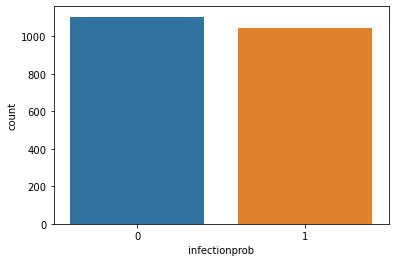

In [6]:
sns.countplot(df['infectionprob'])

In [7]:
df.isnull().sum()

feaver           0
bodypain         0
age              0
runnynose        0
diffbreath       0
infectionprob    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feaver         2148 non-null   float64
 1   bodypain       2148 non-null   int64  
 2   age            2148 non-null   int64  
 3   runnynose      2148 non-null   int64  
 4   diffbreath     2148 non-null   int64  
 5   infectionprob  2148 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 100.8 KB


In [9]:
df.corr()

,feaver,bodypain,age,runnynose,diffbreath,infectionprob
feaver,1.000000,-0.015025,-0.005671,0.022350,0.028328,0.005098
bodypain,-0.015025,1.000000,-0.009516,-0.000156,-0.026064,-0.001083
age,-0.005671,-0.009516,1.000000,-0.001244,-0.015276,-0.003122
runnynose,0.022350,-0.000156,-0.001244,1.000000,0.046370,-0.025925
diffbreath,0.028328,-0.026064,-0.015276,0.046370,1.000000,-0.003229
infectionprob,0.005098,-0.001083,-0.003122,-0.025925,-0.003229,1.000000


In [10]:
X = df.drop("infectionprob",axis=1)
y = df['infectionprob']

In [11]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [14]:
#Predicting the Test set results
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
y_pred_lr = lr.predict(X_train)
score = accuracy_score(y_train,y_pred_lr)
print("Score of Training:",100*score)

Score of Training: 51.0477299185099


In [16]:
#Predicting the Test set results
from sklearn.metrics import r2_score
y_test_pred_lr = lr.predict(X_test)
score = accuracy_score(y_test,y_test_pred_lr)
print("Score of Testing:",100*score)

Score of Testing: 49.53488372093023


In [20]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train);

In [24]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rf, X_train, y_train, cv=10)

In [25]:
cv_results.values.

<function dict.values>

In [21]:
#Predicting the Test set results

from sklearn.metrics import r2_score
y_pred_rf = rf.predict(X_train)
score = accuracy_score(y_train,y_pred_rf)
print("Score of Training:",100*score)

Score of Training: 100.0


In [22]:
#Predicting the Test set results
from sklearn.metrics import r2_score
y_test_pred_rf = rf.predict(X_test)
score = accuracy_score(y_test,y_test_pred_rf)
print("Score of Testing:",100*score)

Score of Testing: 49.53488372093023
